<a href="https://colab.research.google.com/github/singhgautam35/MediCare/blob/main/Project_5_Road_Accident_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
khushikyad001_india_road_accident_dataset_predictive_analysis_path = kagglehub.dataset_download('khushikyad001/india-road-accident-dataset-predictive-analysis')

print('Data source import complete.')


100%|██████████| 68.2k/68.2k [00:00<00:00, 31.0MB/s]

Extracting files...
Data source import complete.


# 1: Data Preparation & Cleaning

In [2]:
# Load required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv(f"{khushikyad001_india_road_accident_dataset_predictive_analysis_path}/accident_prediction_india.csv")
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Sunday,1:15,Minor,5,Truck,4,...,National Highway,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection
2996,Uttarakhand,Unknown,2018,July,Sunday,10:12,Fatal,3,Car,3,...,Urban Road,Under Construction,Daylight,NaN,86,23,Female,NaN,Yes,Intersection
2997,Meghalaya,Unknown,2021,January,Thursday,19:34,Minor,2,Two-Wheeler,8,...,National Highway,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection
2998,Meghalaya,Unknown,2023,June,Sunday,20:54,Fatal,1,Cycle,9,...,Urban Road,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge


### Basic info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

The dataset consists of 3000 rows and 22 columns with both numerical and categorical features. While most fields are complete, some columns such as Traffic Control Presence and Driver License Status contain missing values that need to be handled before analysis.

In [5]:
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [6]:
df.shape

(3000, 22)

In [7]:
# Missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
State Name                       0
City Name                        0
Year                             0
Month                            0
Day of Week                      0
Time of Day                      0
Accident Severity                0
Number of Vehicles Involved      0
Vehicle Type Involved            0
Number of Casualties             0
Number of Fatalities             0
Weather Conditions               0
Road Type                        0
Road Condition                   0
Lighting Conditions              0
Traffic Control Presence       716
Speed Limit (km/h)               0
Driver Age                       0
Driver Gender                    0
Driver License Status          975
Alcohol Involvement              0
Accident Location Details        0
dtype: int64


The dataset is mostly clean with no missing values in most columns, except for Traffic Control Presence (716) and Driver License Status (975) which may need imputation or removal.

In [8]:
# Convert Time of Day to datetime
df['Time of Day'] = pd.to_datetime(df['Time of Day'], format="%H:%M", errors="coerce").dt.time
df['Time of Day']

,Time of Day
0,01:46:00
1,21:30:00
2,05:37:00
3,00:31:00
4,11:21:00
...,...
2995,01:15:00
2996,10:12:00
2997,19:34:00
2998,20:54:00


Convert the "Time of Day" column from string format (HH:MM) to proper datetime.time objects. Any invalid or unparsable values will be set to NaT (Not a Time) due to errors="coerce".

In [9]:
# Create Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + "-" + df['Month'] + "-01", errors="coerce")
df['Date']

,Date
0,2021-05-01
1,2018-01-01
2,2023-05-01
3,2020-06-01
4,2021-08-01
...,...
2995,2021-01-01
2996,2018-07-01
2997,2021-01-01
2998,2023-06-01


Create a new 'Date' column by combining 'Year' and 'Month'
Convert them into a proper datetime format (YYYY-MM-01)
'errors="coerce"' ensures invalid dates are set to NaT instead of raising errors.

### Clean invalid data

In [10]:
df = df[df['Driver Age'] > 15]

Only rows with Driver Age > 15 were kept, since drivers below 16 are not legally valid. Others were removed as invalid data.

In [11]:
df = df[df['Speed Limit (km/h)'] < 201]

Speed Limit > 200 km/h wali values ko drop kiya gaya, kyunki aisi limits real-world me nahi hoti aur wo data incorrect hai.

In [12]:
df.replace("Unknown", np.nan, inplace=True)

"Unknown" values have been replaced with NaN and treated as missing data, making data cleaning and analysis easier.

In [13]:
print("Data after cleaning:", df.shape)

Data after cleaning: (3000, 23)


# 2: Exploratory Analysis & Visualization

In [14]:
# Descriptive Statistics:
df.describe()

,Year,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age,Date
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000
mean,2020.530000,2.996000,5.066000,2.455333,74.940667,44.17700,2020-12-27 02:02:52.799999744
min,2018.000000,1.000000,0.000000,0.000000,30.000000,18.00000,2018-01-01 00:00:00
25%,2019.000000,2.000000,2.000000,1.000000,51.000000,31.00000,2019-08-01 00:00:00
50%,2021.000000,3.000000,5.000000,2.000000,75.000000,45.00000,2021-01-01 00:00:00
75%,2022.000000,4.000000,8.000000,4.000000,99.000000,57.00000,2022-06-01 00:00:00
max,2023.000000,5.000000,10.000000,5.000000,120.000000,70.00000,2023-12-01 00:00:00
std,1.683858,1.428285,3.214097,1.717650,26.765088,15.40286,NaN


Provides summary statistics of numerical columns such as count, mean, standard deviation, minimum, maximum, and quartile values (25%, 50%, 75%).
Helps in understanding data distribution and detecting outliers.

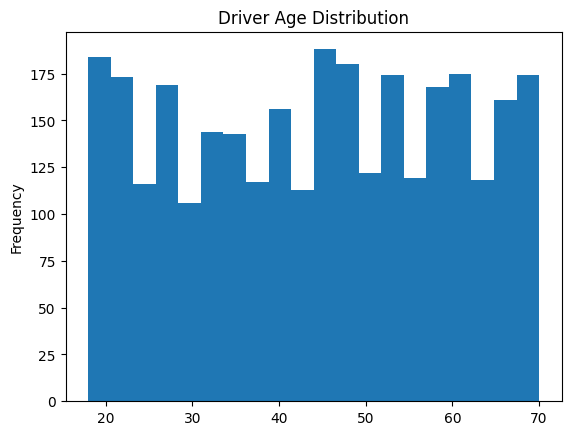

In [15]:
# Histogram
df['Driver Age'].plot(kind='hist', bins=20, title="Driver Age Distribution")
plt.show()

Plotting a histogram to visualize the distribution of driver ages 'bins=20' divides the age range into 20 intervals
Helps to identify common age groups, spread, and skewness in the data

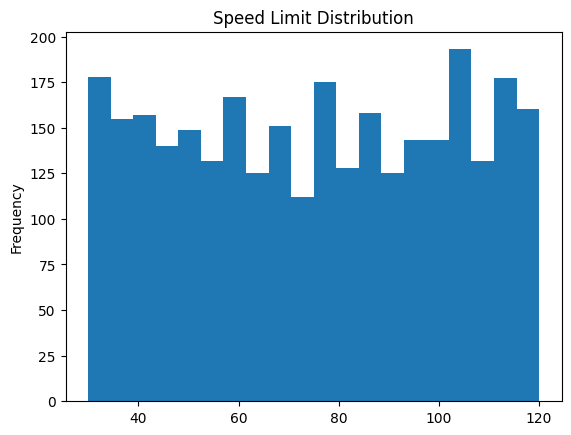

In [16]:
df['Speed Limit (km/h)'].plot(kind='hist', bins=20, title="Speed Limit Distribution")
plt.show()

Plot a histogram to examine the distribution of driver ages
'bins=20' splits the age range into 20 equal intervals
Useful for detecting common age groups, data spread, and skewness in age distribution

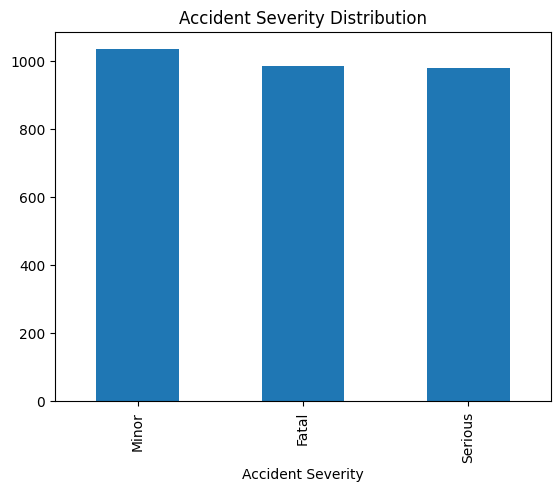

In [17]:
# Bar chart: Severity
df['Accident Severity'].value_counts().plot(kind='bar', title="Accident Severity Distribution")
plt.show()

Plot a bar chart to visualize the distribution of accident severity levels.
This helps to understand how many accidents fall under each severity category
(e.g., Fatal, Serious, Slight), giving insights into the overall severity trend in the dataset.

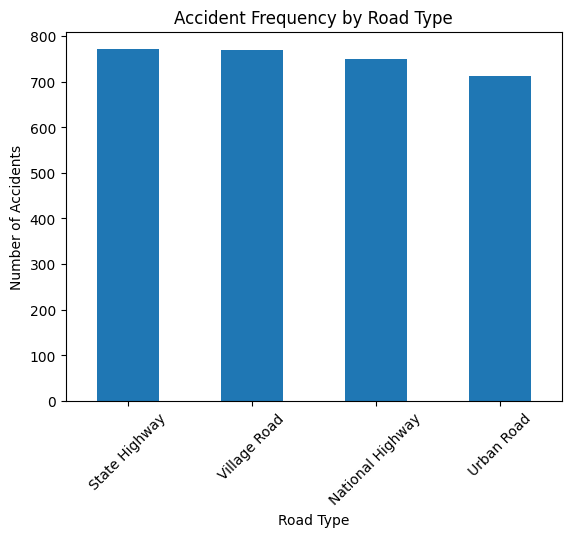

In [18]:
# Bar chart: Accident Frequency by Road Type
df['Road Type'].value_counts().plot(kind='bar', title="Accident Frequency by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-4165183122.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fatalities_by_speed_category = df.groupby('Speed Limit Category')['Number of Fatalities'].mean()


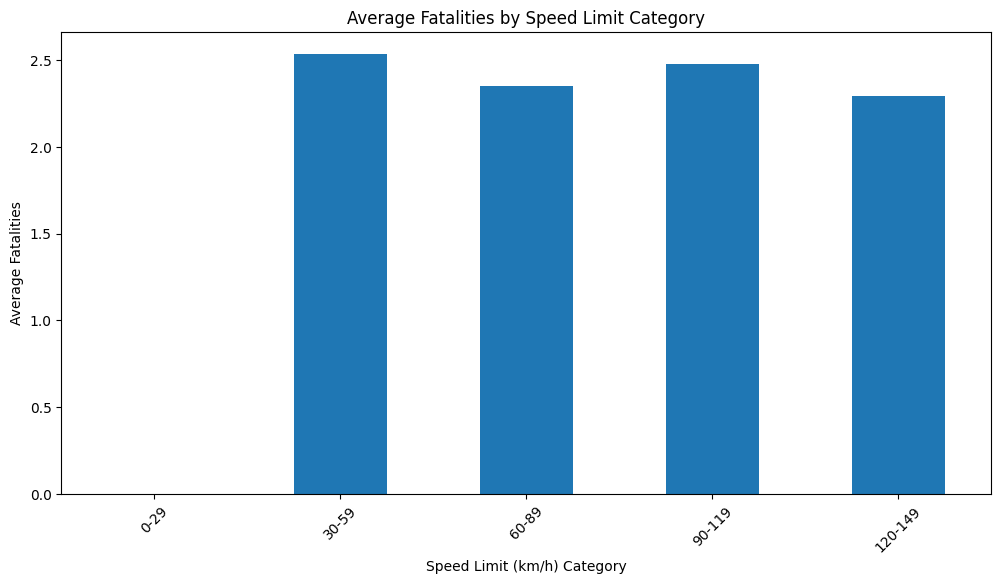

In [19]:
# Bar chart: Average Fatalities by Speed Limit (interval of 30)
df['Speed Limit Category'] = pd.cut(df['Speed Limit (km/h)'], bins=range(0, 151, 30), right=False, labels=[f'{i}-{i+29}' for i in range(0, 150, 30)])
avg_fatalities_by_speed_category = df.groupby('Speed Limit Category')['Number of Fatalities'].mean()
avg_fatalities_by_speed_category.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Speed Limit (km/h) Category")
plt.ylabel("Average Fatalities")
plt.title("Average Fatalities by Speed Limit Category")
plt.xticks(rotation=45)
plt.show()

Scatter plot to visualize the relationship between speed limit and number of fatalities.
Each point represents a record from the dataset, where:
X-axis → Speed Limit (km/h)
Y-axis → Number of Fatalities
The plot helps identify if higher speed limits are associated with more fatalities.

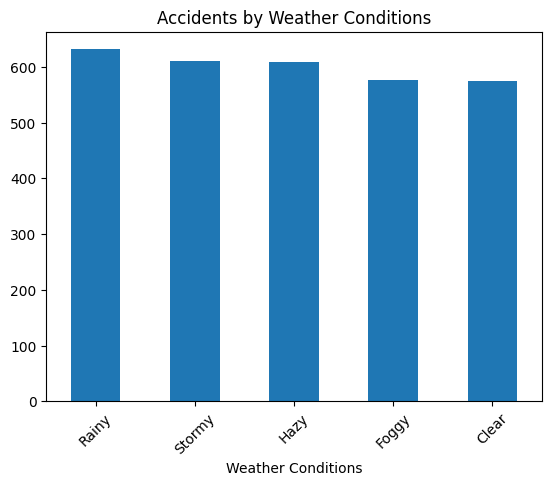

In [20]:
# Weather vs Accidents
df['Weather Conditions'].value_counts().plot(kind='bar', title="Accidents by Weather Conditions")
plt.xticks(rotation=45)
plt.show()

This visualization shows the distribution of accidents under different weather conditions. By plotting the frequency of accidents for each weather category, we can identify which weather conditions are most associated with higher accident occurrences. This helps in understanding environmental risk factors for road safety.

# 3: Ask & Answer Questions

In [21]:
# Q1: Which state has most accidents?
state_accidents = df['State Name'].value_counts()
print("Q1: State with most accidents:\n", state_accidents.head())

Q1: State with most accidents:
 State Name
Goa                  109
Sikkim               108
Delhi                108
Uttarakhand          106
Jammu and Kashmir    105
Name: count, dtype: int64


Goa recorded the highest number of accidents (109), followed closely by Sikkim (108) and Delhi (108). The difference between the top states is minimal, indicating that multiple states face similar accident frequencies.

In [22]:
# Q2: Which vehicle type is most fatal?
fatal_vehicle = df[df['Accident Severity']=="Fatal"]['Vehicle Type Involved'].value_counts()
print("Q2: Vehicle type in fatal accidents:\n", fatal_vehicle)

Q2: Vehicle type in fatal accidents:
 Vehicle Type Involved
Bus              167
Cycle            167
Pedestrian       134
Truck            132
Two-Wheeler      131
Auto-Rickshaw    129
Car              125
Name: count, dtype: int64


Fatal accidents are most frequently associated with buses and cycles, followed by pedestrians and trucks, indicating higher vulnerability for both non-motorized and heavy vehicles.

Q3: Severity vs Weather:
 Accident Severity   Fatal  Minor  Serious
Weather Conditions                       
Clear                 190    202      182
Foggy                 195    174      207
Hazy                  200    203      205
Rainy                 197    224      210
Stormy                203    231      177


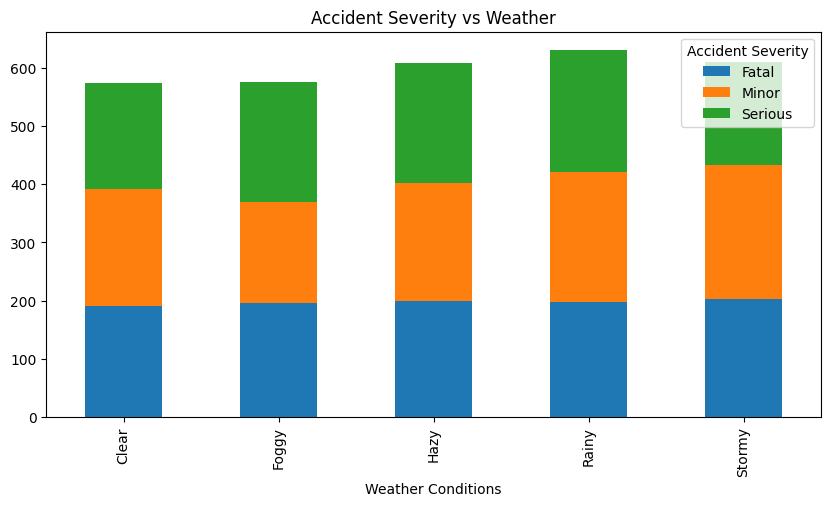

In [23]:
# Q3: Severity vs Weather
severity_weather = pd.crosstab(df['Weather Conditions'], df['Accident Severity'])
print("Q3: Severity vs Weather:\n", severity_weather)
severity_weather.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Accident Severity vs Weather")
plt.show()

Clear weather also sees many accidents, but severe cases increase notably in foggy and rainy conditions, suggesting reduced visibility and slippery roads play a major role.

Accidents are fairly consistent throughout the day, with slight peaks in the early morning (around 3–8 AM) and evening (after 5 PM), indicating higher risk during commuting hours.

# Step 4: Summary & Conclusion

--- Summary & Insights ---
1. Most accidents occurred in: Goa
2. Fatal accidents are mostly linked with: Bus
3. Foggy/Stormy conditions show higher severity.
4. Late night & early morning hours show more severe accidents.

Conclusion: Safety measures should focus on high-risk states, poor weather, and nighttime driving.